In [1]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd

# Loading Data

In [2]:
df = pd.read_csv('/home/dima/Data/trainingData.csv')
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4864920.7782,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4864934.2252,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4864949.5322,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4864934.0930,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4864982.2171,0,0,122,2,11,13,1369909710


In [5]:
train_x = np.array(df.ix[:,0:520])[:100]
train_lon = np.array(df.ix[:,520:521])[:100]
train_lat = np.array(df.ix[:,521:522])[:100]


train_lon = train_lon / np.max(train_lon)

In [6]:
N = len(train_x)
M = 520
print 'N:%d, M:%d' % (N,M)

N:100, M:520


# Implementing Cost Function and Gradient

In [32]:
def cost(x, y, beta, lambd):
    return (1/(2*N)) * np.sum((train_lon - x.dot(beta))**2) + (lambd / (2* M)) * np.sum(beta**2)
    

def gradient(x, y, beta, lambd):
    
    print x.shape
    print beta.shape
    print (y-x.dot(beta))
    #return 1#(1/N) * np.sum((y-x.dot(beta))*x) + (lambd / M) 

# Run the Optimization

(100, 520)
(520,)
[[ 1.02917398  1.02917398  1.02917398 ...,  1.02917398  1.02917398
   1.02917398]
 [ 1.02854033  1.02854033  1.02854033 ...,  1.02854033  1.02854033
   1.02854033]
 [ 1.02615632  1.02615632  1.02615632 ...,  1.02615632  1.02615632
   1.02615632]
 ..., 
 [ 1.00498178  1.00498178  1.00498178 ...,  1.00498178  1.00498178
   1.00498178]
 [ 1.00389192  1.00389192  1.00389192 ...,  1.00389192  1.00389192
   1.00389192]
 [ 1.00464668  1.00464668  1.00464668 ...,  1.00464668  1.00464668
   1.00464668]]


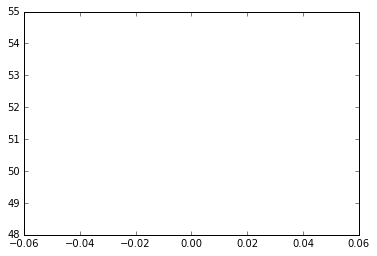

In [33]:
number_of_iters = 100
lambd = 0
learning_rate =0.0001
cost_vals = []
beta = np.zeros(M)

for i in range(number_of_iters):
    cost_val = cost(train_x, train_lon, beta, lambd)
    cost_vals.append(cost_val)
    gradient(train_x, train_lon, beta, lambd)
    break
    #beta += learning_rate* gradient(train_x, train_lon, beta, lambd)
    
plt.plot(cost_vals)

In [27]:
beta

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [31]:
train_x.dot(beta).shape

(100,)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])